In [92]:
FN_compare = [783, 733, 664, 619, 570, 519, 458, 393, 321, 255, 206, 153, 108, 74, 52, 28, 15, 10, 8, 8, 6, 6, 6, 6, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

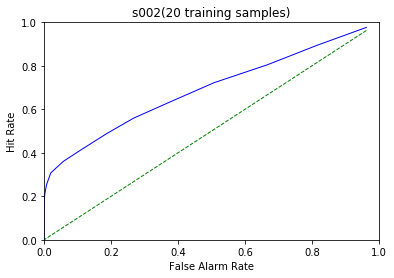

In [24]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

path = './result/pohmm_result/20_train/'
file = 's002_20train_verification_results_out.csv'
fileName = path + file

df = pd.read_csv(fileName)

#正样本
df_positive = df[df["genuine"]==True]
df_sort_positive = df_positive.sort_values(by=['score'])
df_95percent_positive = df_sort_positive[19:380]
mean = df_95percent_positive["score"].mean()
df_score_positive = df_sort_positive["score"]

distance_positive = list( map(lambda x: abs(x - mean), df_score_positive) )
distance_array_positive = np.array(distance_positive)

#负样本
df_negative = df[df["genuine"]==False]
df_sort_negative = df_negative.sort_values(by=['score'])
df_score_negative = df_sort_negative["score"]

distance_negative = list( map(lambda x: abs(x - mean), df_score_negative) )
distance_array_negative = np.array(distance_negative)

#判断函数
def judge(threshold,distance_array):
    out_num = np.sum((distance_array > threshold)) 
    return out_num

threshold_range = np.linspace(1,150,500)

FN = [0]*len(threshold_range)
TP = [0]*len(threshold_range)
FP = [0]*len(threshold_range)
TN = [0]*len(threshold_range)

false_alarm_rate = [0.0]*len(threshold_range)
miss_rate = [0.0]*len(threshold_range)
recall = [0.0]*len(threshold_range)
precision = [0.0]*len(threshold_range)

for i,threshold in enumerate(threshold_range):
    #print('threshold is:',threshold)
    
    out_num = judge(threshold,distance_positive)
    #print('out_num is:',out_num)
    out_num_all = judge(threshold,distance_array_negative)
    #print('out_num_all is:', out_num_all)
     
    FN[i] = out_num
    TP[i] = 400 - out_num
    FP[i] = 2500 -  out_num_all
    TN[i] = out_num_all

    false_alarm_rate[i] = FP[i]/(FP[i]+TN[i])
    miss_rate[i] = FN[i]/(TP[i]+FN[i])
    recall[i] = TP[i]/(TP[i]+FN[i])
    precision[i] = TP[i]/(TP[i]+FP[i])
    
#根据Kevin的定义：
False_Alarm_Rate = list( map(lambda x: x/400, FN) )
Miss_Rate = list( map(lambda x: x/2500, FP) )
Hit_Rate = list( map(lambda x: 1 - x, Miss_Rate) )
plt.plot(False_Alarm_Rate,Hit_Rate,color="blue",linewidth=1)
plt.plot(False_Alarm_Rate,False_Alarm_Rate,'g--',linewidth=1)

plt.title('s002(20 training samples)')
plt.xlabel('False Alarm Rate')
plt.ylabel('Hit Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [25]:
print('FN = ', FN)
print('TP = ', TP)
print('FP = ', FP)
print('TN = ', TN)

#print('FN = ', FN)

FN =  [385, 325, 267, 203, 150, 107, 75, 47, 23, 8, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
TP =  [15, 75, 133, 197, 250, 293, 325, 353, 377, 392, 397, 399, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400]
FP =  [58, 268, 487, 694, 917, 1101, 1278, 1448, 1598, 1731, 1864, 1967, 2066, 2141, 2207, 2272, 2324, 2369, 2393, 2419, 2435, 2442, 2448, 2450, 2450, 2451, 2454, 2459, 2468, 2480, 2487, 2490, 2497, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500]
TN =  [2442, 2232, 2013, 1806, 1583, 1399, 1222, 1052, 902, 769, 636, 533, 434, 359, 293, 228, 176, 131, 107, 81, 65, 58, 52, 50, 50, 49, 46, 41, 32, 20, 13, 10, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
five_Percent_index = FN.index(18)

In [11]:
FP[five_Percent_index]/2500

0.6516

In [12]:
F1=[0.0]*len(TP)
for i in range(len(TP)):
    F1[i] = 2*TP[i]/(2*TP[i]+FP[i]+FN[i])

In [13]:
F1[five_Percent_index]

0.31688096225632517

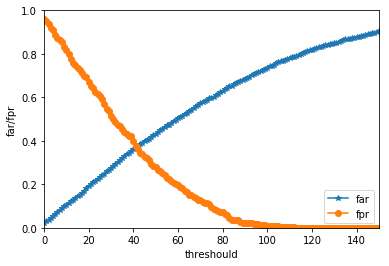

In [14]:
plt.figure()
plt.plot(false_alarm_rate,marker = '*', label = 'far')
plt.plot(miss_rate, marker = 'o', label = 'fpr')
plt.legend()
plt.xlim([0,150])
plt.ylim([0,1])
plt.xlabel('threshould')
plt.ylabel('far/fpr')
plt.show()

In [22]:
miss_rate[42]

0.3625

In [23]:
false_alarm_rate[42]

0.3772